In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("../data/fcc-forum-pageviews.csv",parse_dates =["date"], header="infer", index_col="date")


In [89]:
# Clean data
df = df[(df["value"]>=df["value"].quantile(0.025)) & (df["value"]<=df["value"].quantile(0.975))]

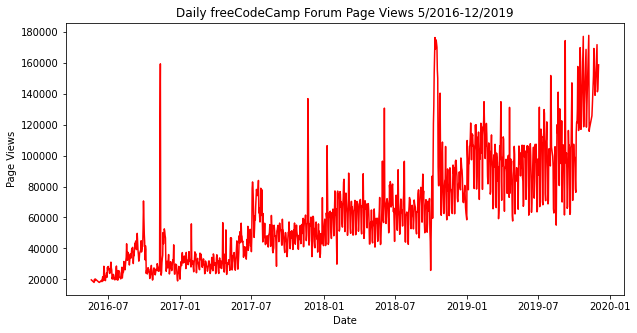

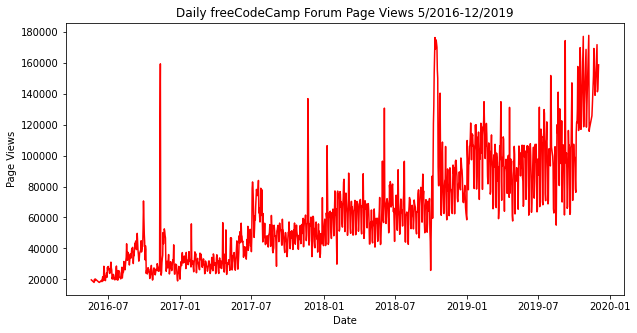

In [90]:
def draw_line_plot():
    # Draw line plot
    
    fig, ax = plt.subplots(figsize=((10,5)))
    
    ax.plot(df.index,df["value"],'r') # "r--" give dotted line
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

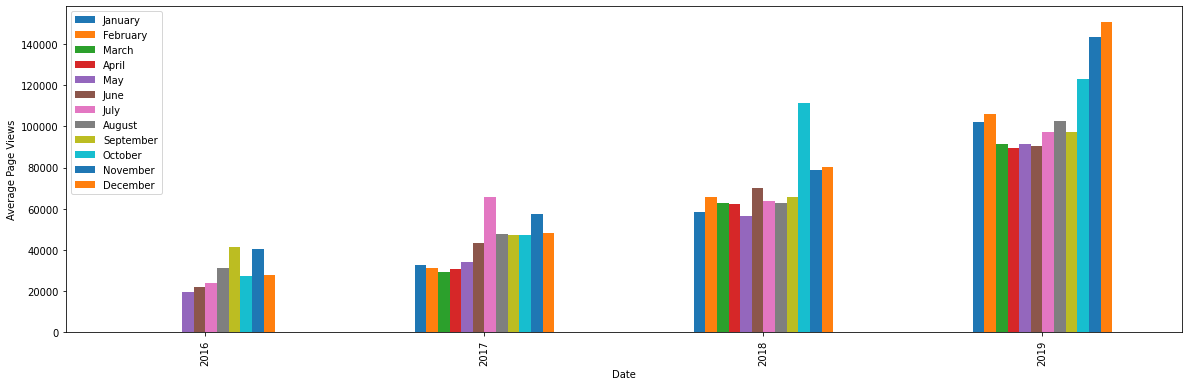

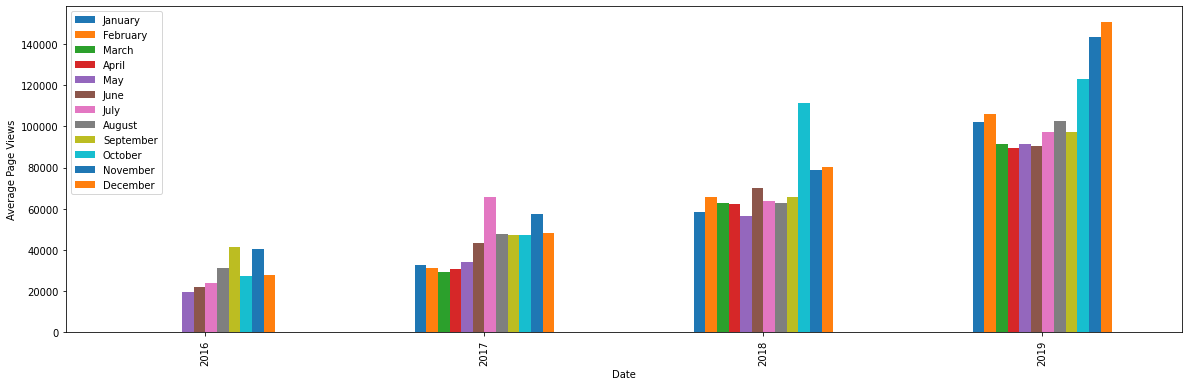

In [91]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    
    df["month"] = df.index.month
    df["year"]= df.index.year
    
    df_bar = df.groupby(["year","month"])["value"].mean()
    # Draw bar plot
    
    df_bar = df_bar.unstack()
    
    fig = df_bar.plot(kind = "bar",legend=True, figsize= (20,6)).figure
    plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October","November","December"])
    
    plt.xlabel("Date")
    plt.ylabel("Average Page Views")
    
    plt.xticks(fontsize =10)
    plt.yticks(fontsize =10)
    fig.savefig("bar_plot.png")
    return fig

draw_bar_plot()

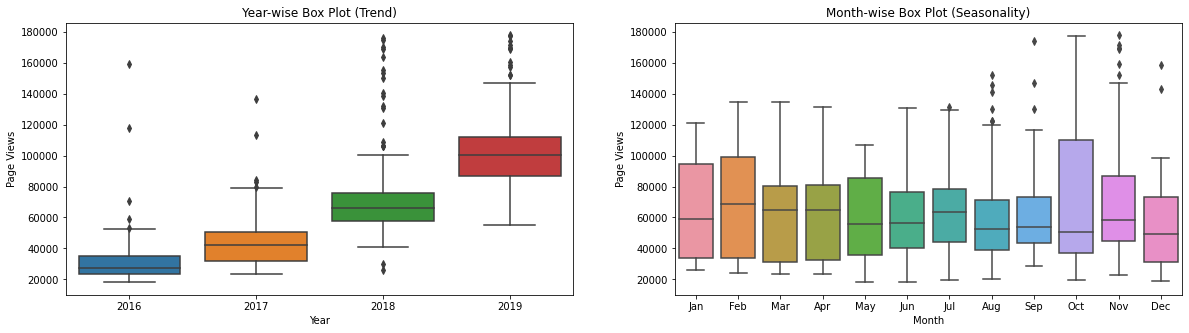

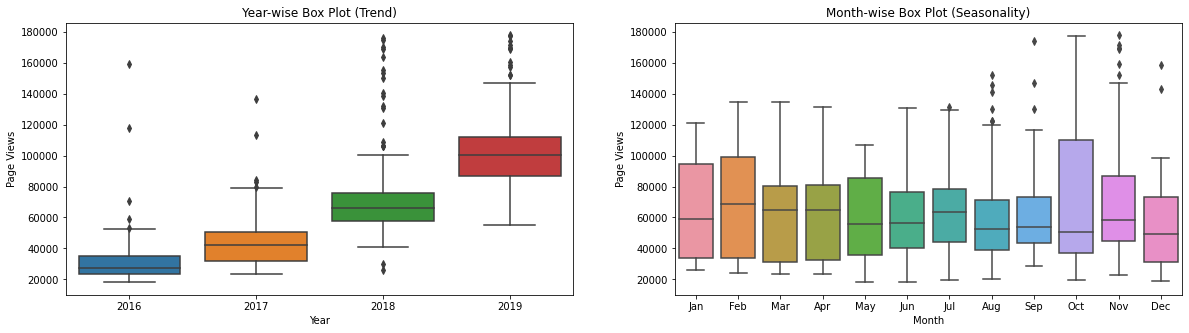

In [106]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    
    # Sort months in ax[1]
    
    df_box["month_num"]= df_box["date"].dt.month
    df_box =df_box.sort_values("month_num")

    # Draw box plots (using Seaborn)
    
    fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
    sns.boxplot(ax= ax[0], x="year", y="value", data =df_box)
    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")
    
    sns.boxplot(ax= ax[1], x="month", y="value", data=df_box)
    ax[1].set_title("Month-wise Box Plot (Seasonality)" )
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")
    


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()